In [572]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.ensemble import RandomForestRegressor
from datetime import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from subprocess import check_output
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [519]:
hourly_data = pd.read_csv('C:/Users/16282/Desktop/Bikeshare/Data/hourly.csv')

In [520]:

print(hourly_data.shape)

(17379, 17)


In [521]:
hourly_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [522]:
hourly_data.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##### Let us check the average count for the target value Y (cnt) for both the datasets

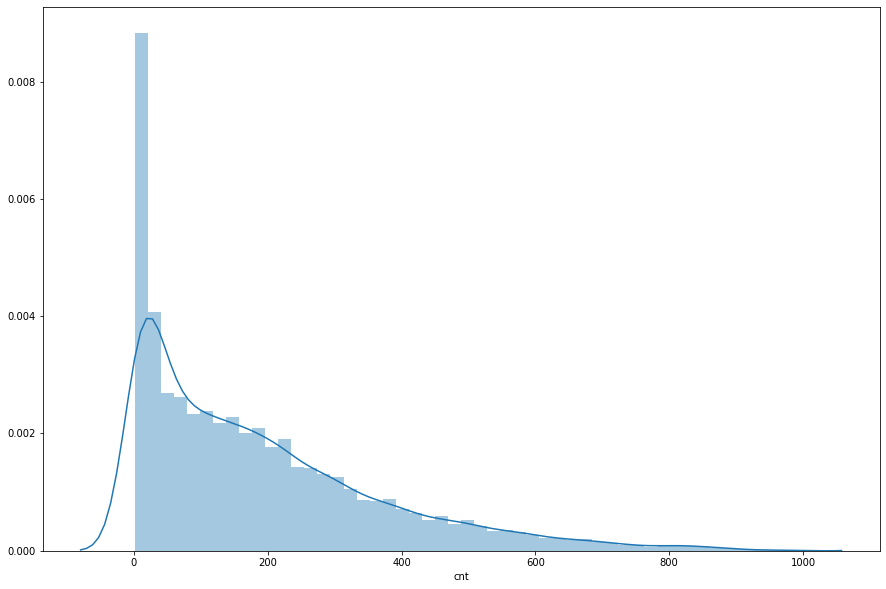

In [523]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(hourly_data['cnt'])

##### For daily dataset

In [524]:
X_d = pd.DataFrame(hourly_data, columns=["weekday","holiday","workingday","temp","atemp","hum","windspeed"])

In [525]:
y_d = pd.DataFrame(hourly_data, columns=["cnt"])

#### Now we split the data into training and test set for daily dataset

In [526]:
X_d_train, X_d_test, y_d_train, y_d_test = train_test_split(X_d, y_d, test_size=0.2, random_state=0)

In [527]:
lm = linear_model.LinearRegression()
model_daily = lm.fit(X_d_train,y_d_train)

In [528]:
prediction_d = lm.predict(X_d_test)

In [529]:
print(prediction_d)

[[147.04961987]
 [ 96.88111468]
 [204.38693244]
 ...
 [202.05994818]
 [ 74.03155285]
 [133.22286412]]


In [530]:
lm.score(X_d_train,y_d_train)

0.24962032522496055

#### The model we created has a score of 0.24 which is very less and shows that the model is not predicting well... To imporve our Model's prediction capabalities we will include or remove features that will help us determine the correct prediction for cnt.

In [531]:
X_d1 = pd.DataFrame(hourly_data, columns=["temp","atemp","hum","windspeed","workingday","weathersit"])

In [532]:
X_d1_train, X_d1_test, y_d1_train, y_d1_test = train_test_split(X_d1, y_d, test_size=0.2, random_state=0)

In [533]:
model_daily1 = lm.fit(X_d1_train,y_d1_train)
prediction_d1 = lm.predict(X_d1_test)

In [534]:
print(prediction_d1)

[[136.82562732]
 [ 93.45478978]
 [202.00190018]
 ...
 [202.37296462]
 [ 70.26132569]
 [132.5845391 ]]


In [535]:
lm.score(X_d1_train,y_d1_train)

0.2491987910904635

##### We can observe that adding the features working day and weathersit did not significantly affect the performance of the Model. So to select the correct features for our model we will use the Random Tree Classifier to determine the important features that will affect our Model's prediction accuracy.

In [536]:
X = pd.DataFrame(hourly_data, columns=["season","yr","mnth","holiday","weekday","temp","atemp","hum","windspeed","workingday","weathersit","registered","casual"])

In [537]:
y = pd.DataFrame(hourly_data, columns=['cnt'])

C:\Users\16282\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\16282\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[0.02088467 0.013848   0.06140738 0.00414093 0.06853159 0.10053405
 0.10120813 0.11460369 0.12080532 0.00952745 0.03920021 0.19727011
 0.14803848]


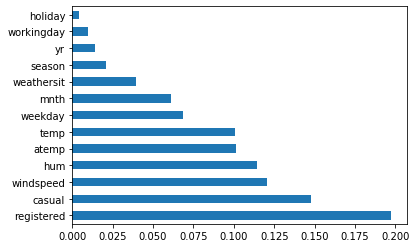

temp          0.233230
atemp         0.233382
hum           0.240261
windspeed     0.230919
workingday    0.025565
weathersit    0.036643
dtype: float64


In [538]:

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
significance = pd.Series(model.feature_importances_, index = X.columns)
significance.nlargest(20).plot(kind = 'barh')

plt.show()
print(feat_importance)

#### So from the above graph we can see that features like 'atemp', 'hum', 'temp' and 'windspeed' have a significant affect on the predictor variable y (cnt)

In [539]:
X_d2 = pd.DataFrame(hourly_data, columns=["temp","atemp","hum","windspeed","mnth"])

In [540]:
X_d2_train, X_d2_test, y_d2_train, y_d2_test = train_test_split(X_d2, y_d, test_size=0.2, random_state=0)

In [541]:
model_daily2 = lm.fit(X_d2_train,y_d2_train)
prediction_d2 = lm.predict(X_d2_test)

In [542]:
lm.score(X_d2_train,y_d2_train)

0.25885849555675744

#### We can see that our score has incread to 0.51 for our model with above features

### Random Forest Regression

In [543]:
from sklearn.ensemble import RandomForestRegressor

In [544]:
rf = RandomForestRegressor(n_estimators=100, random_state=0)

In [545]:
rf_fit = rf.fit(X_d2_train, y_d2_train)

C:\Users\16282\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [546]:
rgpredict = rf_fit.predict(X_d2_test)

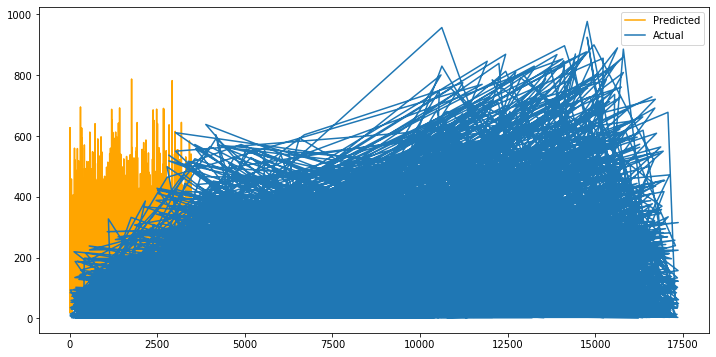

In [547]:
plt.figure(figsize = (12,6))
plt.plot(rgpredict,label='Predicted',color='orange')
plt.plot(y_d2_test,label='Actual')
plt.legend()
plt.show()

----

#### Random Forest

In [548]:
data_rf = pd.read_csv('C:/Users/16282/Desktop/Bikeshare/Data/hourly.csv')

In [549]:
data_rf.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [550]:
def DummyGeneration(d, dc):
    dummies = pd.get_dummies(d[dc], prefix=dc)
    d = pd.concat([d, dummies], axis=1)
    return d

X_hourly = pd.DataFrame.copy(hourly_data)
dcs = ["season", "yr", "mnth", "hr", "weekday", "weathersit"]
for dc in dcs:
    X_hourly = DummyGeneration(X_hourly, dc)

In [551]:
print(X_hourly.shape)

(17379, 70)


In [552]:
for dc in dcs:
    del X_hourly[dc]
    
### This will remove the categorical variables.

In [553]:
X_hourly.head()

,instant,dteday,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,1,2011-01-01,0,0,0.24,0.2879,0.81,0.0,3,13,...,0,0,0,0,0,1,1,0,0,0
1,2,2011-01-01,0,0,0.22,0.2727,0.80,0.0,8,32,...,0,0,0,0,0,1,1,0,0,0
2,3,2011-01-01,0,0,0.22,0.2727,0.80,0.0,5,27,...,0,0,0,0,0,1,1,0,0,0
3,4,2011-01-01,0,0,0.24,0.2879,0.75,0.0,3,10,...,0,0,0,0,0,1,1,0,0,0
4,5,2011-01-01,0,0,0.24,0.2879,0.75,0.0,0,1,...,0,0,0,0,0,1,1,0,0,0


In [554]:
y_hourly = X_hourly['cnt']

In [555]:
del X_hourly['dteday']
del X_hourly['instant']
del X_hourly['cnt']
del X_hourly['casual']
del X_hourly['registered']

In [556]:
y_hourly.head(5)

0    16
1    40
2    32
3    13
4     1
Name: cnt, dtype: int64

In [557]:
X_hourly.head(5)

,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0,0,0.24,0.2879,0.81,0.0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0,0,0.22,0.2727,0.80,0.0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,0,0,0.22,0.2727,0.80,0.0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,0,0,0.24,0.2879,0.75,0.0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,0,0,0.24,0.2879,0.75,0.0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0


#### Here we are splitting the data into a ratio of 75:25 for train and test values

In [565]:
X_train, X_test, y_train, y_test = train_test_split(X_hourly, y_hourly, random_state = 22, test_size = 0.25)

#### We will use the random forest regressor to check for our predictions

In [566]:

rfr = RandomForestRegressor(n_estimators = 300, max_features = 'auto') 
rfr.fit(X_h_train,y_h_train)


y_prediction = rfr.predict(X_h_test) 


In [567]:
mean_absolute_error(y_h_test, y_prediction)

31.247448106745573

In [568]:
Accuracy = cross_val_score(estimator = rfr, X = X_train, y = y_train, cv =10)
Accuracy.mean()

0.9173884009024433

#### We have received an accuracy of 91% with random forest.

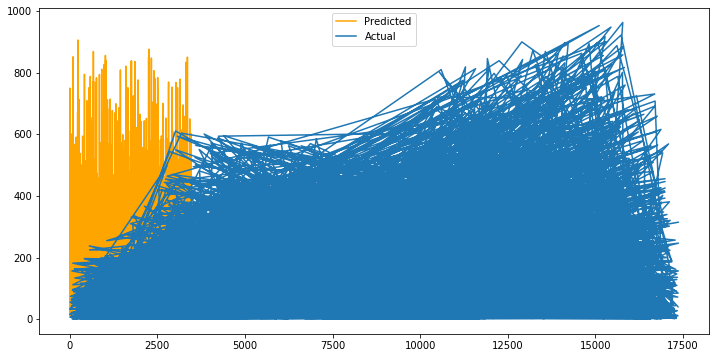

In [569]:
plt.figure(figsize = (12,6))
plt.plot(y_prediction,label='Predicted',color='orange')
plt.plot(y_test,label='Actual')
plt.legend()
plt.show()

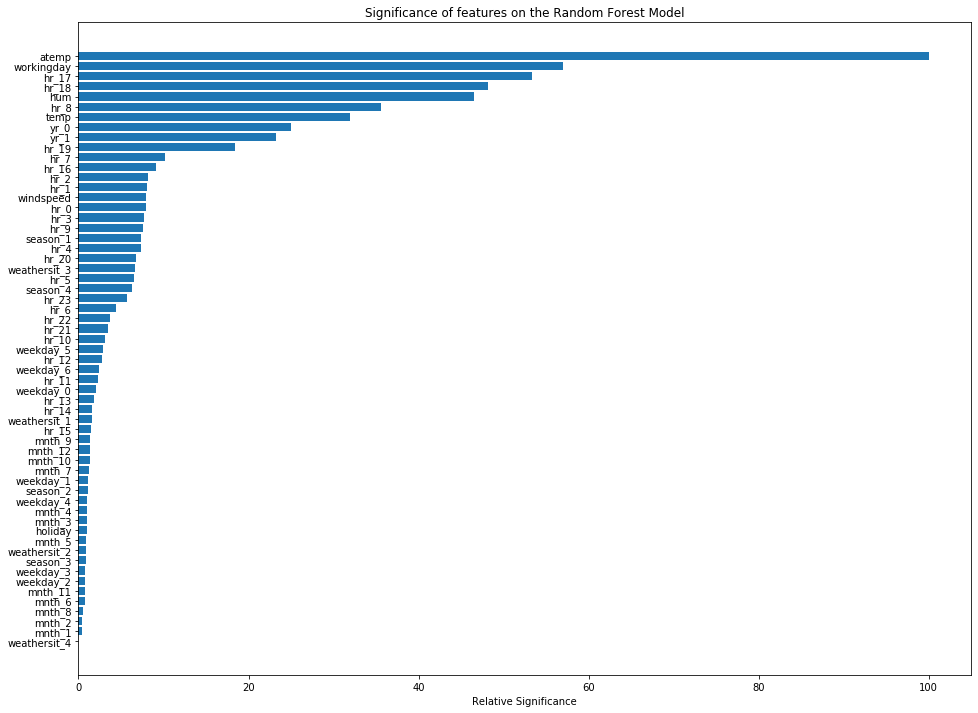

In [577]:
significance = rfr.feature_importances_
significance =  (significance / significance.max()) * 100
index = np.argsort(significance)
orint = np.arange(index.shape[0]) + 1
plt.figure(figsize=(16,12))
plt.barh(orint, significance[index], align='center')
plt.yticks(orint, X_train.columns[index])
plt.xlabel('Relative Significance')
plt.title('Significance of features on the Random Forest Model')
plt.show()